# Graduation Rotational Internship Program - Task-3

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# Checking the dataset for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [3]:
# As all catogories equally classified, so we do not need to apply class imbalance techniques.
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
# Checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Converting all data into numeric using label encoding 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

fact_cols = df.select_dtypes(include = 'object')
df[fact_cols.columns] = df[fact_cols.columns].apply(le.fit_transform)

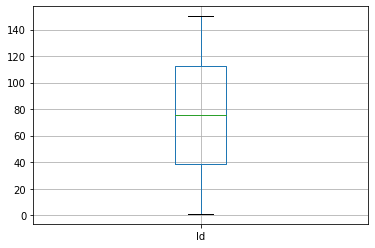

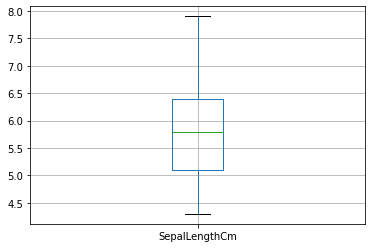

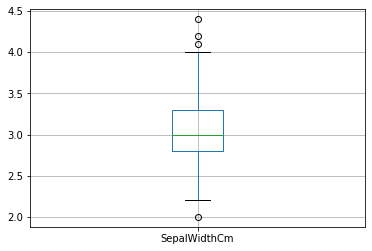

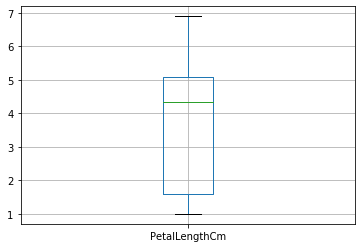

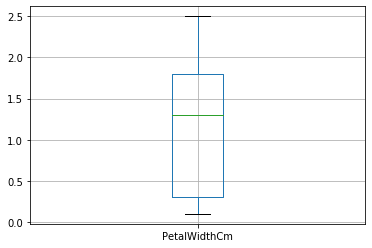

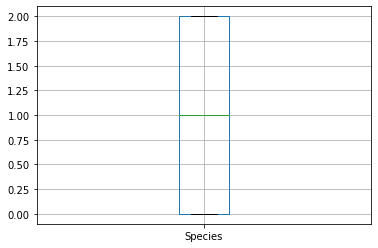

In [7]:
# Checking for Outliers
for i in df.columns:
    plt.figure()
    df.boxplot([i])

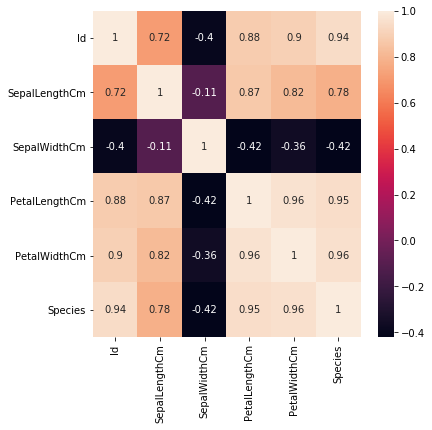

In [8]:
# Giving the corellation between columns using a Heat Map
import seaborn as sns

plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True)

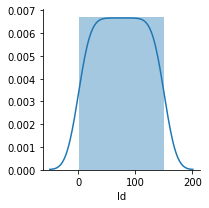

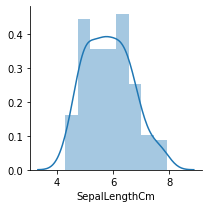

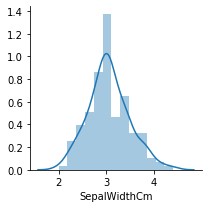

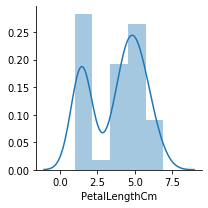

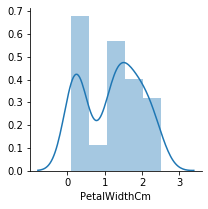

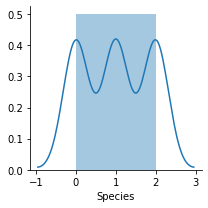

In [9]:
# Checking the distribution of the data

for i in df.columns:
    graph_plot = sns.FacetGrid(data=df,legend_out=False)
    print(graph_plot.map(sns.distplot,i))

## Finding number of cluster (K) using the Elbow Method
**To get a right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.**

In [10]:
from sklearn.cluster import KMeans
List = list()
for i in range(1,8):
    clust_model = KMeans(n_clusters=i)
    clust_model.fit(df)
    dist = clust_model.fit(df).score(df)
    List.append(dist)
    
print(List)

[-282018.3244, -70649.63226666671, -31367.55006274511, -17815.06135964906, -11454.14528624401, -7929.943048717926, -5917.869462827056]


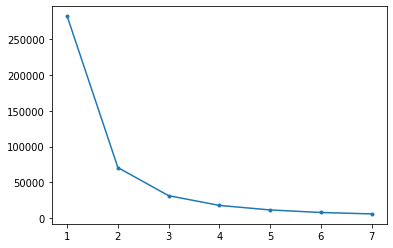

In [11]:
# plotting and finding the Ellbow point
List = np.absolute(List)
List_2 = [1,2,3,4,5,6,7]
plt.plot(List_2,List, marker = ".")

## As we can see that 3 is the Elbow point number of cluster. So now we will fit and check the clusters with k=3.

# Building the model

In [12]:
kmeans_model = KMeans(n_clusters=3, max_iter = 100)

#Fitting the model
kmeans_model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
# Checking the centroids of the cluster

kmeans_model.cluster_centers_

array([[ 25.5  ,   5.006,   3.418,   1.464,   0.244,   0.   ],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ,   1.326,   1.   ],
       [125.5  ,   6.588,   2.974,   5.552,   2.026,   2.   ]])

In [14]:
# Describing the cluster for each datapoint

df_cluster = pd.concat([df, pd.Series(kmeans_model.labels_)], axis=1)
df_cluster.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,0
0,1,5.1,3.5,1.4,0.2,0,0
1,2,4.9,3.0,1.4,0.2,0,0
2,3,4.7,3.2,1.3,0.2,0,0
3,4,4.6,3.1,1.5,0.2,0,0
4,5,5.0,3.6,1.4,0.2,0,0


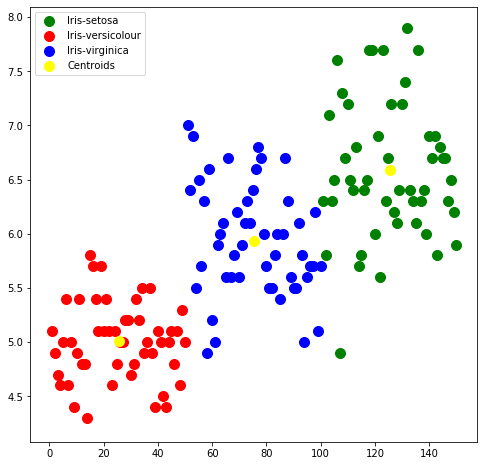

In [15]:
X = df.iloc[:, [0, 1, 2, 3]].values

#Creating the kmeans classifier
y_kmeans = kmeans_model.fit_predict(X)

#Plotting the graph to represent the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='green', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='red', label='Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s = 100, c = 'blue', label = 'Iris-virginica')

#Plotting the centroids of the clusters

plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s=100, c='yellow', label='Centroids')
plt.legend()